In [32]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

from PIL import Image
from PIL import ImageFile
import rawpy
import imageio
ImageFile.LOAD_TRUNCATED_IMAGES = True


import os, shutil

In [8]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Notebooks'

In [15]:
typdict = {'NDC':'str'}
directory2 = pd.read_excel('../data/directory_reference_images.xls')
directory2

,ndc11,rxcui,name,rxnavImageObjectId,rxnavImageFileName,nlmImageFileName,RXNAV 120,RXBASE 120,RXNAV 300,RXBASE 300,RXNAV 600,RXBASE 600,RXNAV 800,RXBASE 800,RXNAV 1024,RXBASE 1024,RXNAV ORIGINAL,RXBASE ORIGINAL
0,00093-0311-01,978006,Loperamide Hydrochloride 2 MG Oral Capsule,185643662,00093-0311-01_RXNAVIMAGE10_26211358.jpg,00093-0311-01_NLMIMAGE10_6315B1FD.jpg,image/images/gallery/120/00093-0311-01_RXNAVIM...,image/images/gallery/120/00093-0311-01_NLMIMAG...,image/images/gallery/300/00093-0311-01_RXNAVIM...,image/images/gallery/300/00093-0311-01_NLMIMAG...,image/images/gallery/600/00093-0311-01_RXNAVIM...,image/images/gallery/600/00093-0311-01_NLMIMAG...,image/images/gallery/800/00093-0311-01_RXNAVIM...,image/images/gallery/800/00093-0311-01_NLMIMAG...,image/images/gallery/1024/00093-0311-01_RXNAVI...,image/images/gallery/1024/00093-0311-01_NLMIMA...,image/images/gallery/original/00093-0311-01_RX...,image/images/gallery/original/00093-0311-01_NL...
1,00093-3165-01,197985,Minocycline 50 MG Oral Capsule,185646490,00093-3165-01_RXNAVIMAGE10_36231B28.jpg,00093-3165-01_NLMIMAGE10_19270CA8.jpg,image/images/gallery/120/00093-3165-01_RXNAVIM...,image/images/gallery/120/00093-3165-01_NLMIMAG...,image/images/gallery/300/00093-3165-01_RXNAVIM...,image/images/gallery/300/00093-3165-01_NLMIMAG...,image/images/gallery/600/00093-3165-01_RXNAVIM...,image/images/gallery/600/00093-3165-01_NLMIMAG...,image/images/gallery/800/00093-3165-01_RXNAVIM...,image/images/gallery/800/00093-3165-01_NLMIMAG...,image/images/gallery/1024/00093-3165-01_RXNAVI...,image/images/gallery/1024/00093-3165-01_NLMIMA...,image/images/gallery/original/00093-3165-01_RX...,image/images/gallery/original/00093-3165-01_NL...
2,00093-0810-01,198045,Nortriptyline 10 MG Oral Capsule,185646437,00093-0810-01_RXNAVIMAGE10_24231228.jpg,00093-0810-01_NLMIMAGE10_34271A58.jpg,image/images/gallery/120/00093-0810-01_RXNAVIM...,image/images/gallery/120/00093-0810-01_NLMIMAG...,image/images/gallery/300/00093-0810-01_RXNAVIM...,image/images/gallery/300/00093-0810-01_NLMIMAG...,image/images/gallery/600/00093-0810-01_RXNAVIM...,image/images/gallery/600/00093-0810-01_NLMIMAG...,image/images/gallery/800/00093-0810-01_RXNAVIM...,image/images/gallery/800/00093-0810-01_NLMIMAG...,image/images/gallery/1024/00093-0810-01_RXNAVI...,image/images/gallery/1024/00093-0810-01_NLMIMA...,image/images/gallery/original/00093-0810-01_RX...,image/images/gallery/original/00093-0810-01_NL...
3,00093-0811-01,317136,Nortriptyline 25 MG Oral Capsule,185646420,00093-0811-01_RXNAVIMAGE10_20231018.jpg,00093-0811-01_NLMIMAGE10_15270A98.jpg,image/images/gallery/120/00093-0811-01_RXNAVIM...,image/images/gallery/120/00093-0811-01_NLMIMAG...,image/images/gallery/300/00093-0811-01_RXNAVIM...,image/images/gallery/300/00093-0811-01_NLMIMAG...,image/images/gallery/600/00093-0811-01_RXNAVIM...,image/images/gallery/600/00093-0811-01_NLMIMAG...,image/images/gallery/800/00093-0811-01_RXNAVIM...,image/images/gallery/800/00093-0811-01_NLMIMAG...,image/images/gallery/1024/00093-0811-01_RXNAVI...,image/images/gallery/1024/00093-0811-01_NLMIMA...,image/images/gallery/original/00093-0811-01_RX...,image/images/gallery/original/00093-0811-01_NL...
4,00093-0812-01,198046,Nortriptyline 50 MG Oral Capsule,185646464,00093-0812-01_RXNAVIMAGE10_2D2316D8.jpg,00093-0812-01_NLMIMAGE10_DD0E6EE3.jpg,image/images/gallery/120/00093-0812-01_RXNAVIM...,image/images/gallery/120/00093-0812-01_NLMIMAG...,image/images/gallery/300/00093-0812-01_RXNAVIM...,image/images/gallery/300/00093-0812-01_NLMIMAG...,image/images/gallery/600/00093-0812-01_RXNAVIM...,image/images/gallery/600/00093-0812-01_NLMIMAG...,image/images/gallery/800/00093-0812-01_RXNAVIM...,image/images/gallery/800/00093-0812-01_NLMIMAG...,image/images/gallery/1024/00093-0812-01_RXNAVI...,image/images/gallery/1024/00093-0812-01_NLMIMA...,image/images/gallery/original/00093-0812-01_RX...,image/images/gallery/original/00093-0812-01_NL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [19]:
typdict = {'NDC':'str'}
directory = pd.read_csv('../Data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
directory

,NDC,IDK,FILE,TYPE,DRUG
0,00002322730,1,PillProjectDisc69/images/CLLLLUPGIX7J8MP1WWQ9W...,C3PI_Reference,STRATTERA 10MG
1,00002322730,1,PillProjectDisc98/images/PRNJ-AXZIQ!HUQKJJBP_D...,C3PI_Reference,STRATTERA 10MG
2,00002322730,1,PillProjectDisc10/images/79U-YY6M1UUR6F127ZMAC...,C3PI_Test,STRATTERA 10MG
3,00002322730,1,PillProjectDisc11/images/7WVFV5H74!ELFNQ_GUH92...,C3PI_Test,STRATTERA 10MG
4,00002322730,1,PillProjectDisc20/images/B4CH0R9B7PEQ6GORRX-8X...,C3PI_Test,STRATTERA 10MG
...,...,...,...,...,...
133769,99207046730,1,PillProjectDisc103/images/TY5OVXLLOXV6H4I1TDVT...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB
133770,99207046730,1,PillProjectDisc31/images/BEIR3XK38EMGSDOZTWMUK...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB
133771,99207046730,1,PillProjectDisc69/images/CLJ1W40OS0XG5H6IVYT!N...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB
133772,99207046730,1,PillProjectDisc77/images/CSUHWDZ!XAZSEJHDANMFR...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB


In [30]:
directory[directory.NDC.str.startswith('001439803')]

,NDC,IDK,FILE,TYPE,DRUG
34234,00143980350,1,PillProjectDisc50/images/BWGPNLDM_SAL6YF9I2996...,C3PI_Reference,"DOXYCYCLINE HYCLATE Capsules, USP"
34235,00143980350,1,PillProjectDisc97/images/O2S1MC!VKHKUYDKLALV0R...,C3PI_Reference,"DOXYCYCLINE HYCLATE Capsules, USP"
34236,00143980350,1,PillProjectDisc10/images/6WAWW!66W_-ZUI7EY2VFN...,MC_API_NLMIMAGE_V1.3,"DOXYCYCLINE HYCLATE Capsules, USP"
34237,00143980350,1,PillProjectDisc45/images/BRIJ3BMW-0NUA!F!P86OG...,MC_API_RXNAV_V1.3,"DOXYCYCLINE HYCLATE Capsules, USP"
34238,00143980350,1,PillProjectDisc105/images/VBPLYXDSL!-1Y!BXF_Z_...,MC_C3PI_REFERENCE_SEG_V1.6,"DOXYCYCLINE HYCLATE Capsules, USP"
34239,00143980350,1,PillProjectDisc45/images/BRH5M1D9!H8-NDP0SSPJT...,MC_C3PI_REFERENCE_SEG_V1.6,"DOXYCYCLINE HYCLATE Capsules, USP"
34240,00143980350,1,PillProjectDisc48/images/BUEZU7RO5!O2QB61EQ_H-...,MC_C3PI_REFERENCE_SEG_V1.6,"DOXYCYCLINE HYCLATE Capsules, USP"
34241,00143980350,1,PillProjectDisc52/images/BY0!AEPRZ1YJFCMG4JM3B...,MC_C3PI_REFERENCE_SEG_V1.6,"DOXYCYCLINE HYCLATE Capsules, USP"
34242,00143980350,1,PillProjectDisc55/images/C0FZQEE-14926KUIXXDAB...,MC_C3PI_REFERENCE_SEG_V1.6,"DOXYCYCLINE HYCLATE Capsules, USP"
34243,00143980350,1,PillProjectDisc69/images/CLI8M-6H17D53ROJBJZUM...,MC_C3PI_REFERENCE_SEG_V1.6,"DOXYCYCLINE HYCLATE Capsules, USP"


In [34]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Notebooks'

In [35]:
pills = pd.read_csv('../Data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
pills = pills.dropna()
pills.DRUG = pills.DRUG.str.upper()
pills[['ORIG_FOLDER','IMAGES','FILENAME']] = pills.FILE.str.split('/', expand=True)
pills['FILETYPE'] = pills.FILENAME.str[-4:]

In [36]:
pills2 = pills[pills.NDC.isin(['00555901258',
'00555903270',
'52544029128',
'63459070160',
'00039022310',
'00555903458',
'50419040901',
'51285011458',
'00007365022',
'49702020218',
'00173024255'])]
pills

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
0,00002322730,1,PillProjectDisc69/images/CLLLLUPGIX7J8MP1WWQ9W...,C3PI_Reference,STRATTERA 10MG,PillProjectDisc69,images,CLLLLUPGIX7J8MP1WWQ9WN4-CO0B5NV.CR2,.CR2
1,00002322730,1,PillProjectDisc98/images/PRNJ-AXZIQ!HUQKJJBP_D...,C3PI_Reference,STRATTERA 10MG,PillProjectDisc98,images,PRNJ-AXZIQ!HUQKJJBP_DV44ST0KN9.CR2,.CR2
2,00002322730,1,PillProjectDisc10/images/79U-YY6M1UUR6F127ZMAC...,C3PI_Test,STRATTERA 10MG,PillProjectDisc10,images,79U-YY6M1UUR6F127ZMACIWPEEXHLB.JPG,.JPG
3,00002322730,1,PillProjectDisc11/images/7WVFV5H74!ELFNQ_GUH92...,C3PI_Test,STRATTERA 10MG,PillProjectDisc11,images,7WVFV5H74!ELFNQ_GUH92E9ERM9P2K.JPG,.JPG
4,00002322730,1,PillProjectDisc20/images/B4CH0R9B7PEQ6GORRX-8X...,C3PI_Test,STRATTERA 10MG,PillProjectDisc20,images,B4CH0R9B7PEQ6GORRX-8XWOL-_G7W9_.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
133769,99207046730,1,PillProjectDisc103/images/TY5OVXLLOXV6H4I1TDVT...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB,PillProjectDisc103,images,TY5OVXLLOXV6H4I1TDVT4TFQ6TYEJ4.PNG,.PNG
133770,99207046730,1,PillProjectDisc31/images/BEIR3XK38EMGSDOZTWMUK...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB,PillProjectDisc31,images,BEIR3XK38EMGSDOZTWMUK20JMK1IHJM.PNG,.PNG
133771,99207046730,1,PillProjectDisc69/images/CLJ1W40OS0XG5H6IVYT!N...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB,PillProjectDisc69,images,CLJ1W40OS0XG5H6IVYT!NIFZEUNEOCH.PNG,.PNG
133772,99207046730,1,PillProjectDisc77/images/CSUHWDZ!XAZSEJHDANMFR...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB,PillProjectDisc77,images,CSUHWDZ!XAZSEJHDANMFR8ED0SO2KS_.PNG,.PNG


In [37]:
pills.FILETYPE.value_counts()

.PNG    61523
.JPG    59414
.CR2    10334
.WMV     2503
Name: FILETYPE, dtype: int64

In [407]:
len(directory.NDC.value_counts().index)

4864

In [ ]:
ndcname = pills[['NDC','DRUG']].groupby(['NDC','DRUG']).sum()

In [274]:
top10 = pills.NDC.value_counts()
len(top10),top10

(11,
 00555901258    142
 00555903270    142
 52544029128    136
 63459070160    136
 00039022310    117
 00555903458    116
 50419040901    113
 51285011458    111
 00007365022    103
 00173024255     99
 49702020218     99
 Name: NDC, dtype: int64)

In [275]:
top10NDC = top10.index.tolist()
top10NDC

['00555901258',
 '00555903270',
 '52544029128',
 '63459070160',
 '00039022310',
 '00555903458',
 '50419040901',
 '51285011458',
 '00007365022',
 '00173024255',
 '49702020218']

In [276]:
df = pills[pills.NDC.isin(top10NDC)]
df.DRUG.value_counts()

NORTEL 7/7/7                  142
TRI-LEGEST FE                 142
TRIVORA TAB                   136
AMARYL 4MG TABLETS            117
NATAZIA                       113
MIRCETTE                      111
AMRIX CAP 30MG                101
BALZIVA                        66
LANOXIN TABLETS, USP           55
COMBIVIR                       55
DYAZIDE CAPS                   52
DYAZIDE                        51
BALZIVA TAB                    50
COMBIVIR 150/300MG TABLETS     44
LANOXIN 0.125MG TABLETS        44
AMRIX                          35
Name: DRUG, dtype: int64

In [277]:
df.DRUG[df.NDC == '00555901258'] = 'NORTREL'

df.DRUG[df.NDC == '00555903270'] = 'TRILEGEST'

df.DRUG[df.NDC == '52544029128'] = 'TRIVORA'

df.DRUG[df.NDC == '63459070160'] = 'AMRIX'

df.DRUG[df.NDC == '00039022310'] = 'AMARYL'

df.DRUG[df.NDC == '00555903458'] = 'BALZIVA'

df.DRUG[df.NDC == '50419040901'] = 'NATAZIA'

df.DRUG[df.NDC == '51285011458'] = 'MIRCETTE'

df.DRUG[df.NDC == '00007365022'] = 'DYAZIDE'

df.DRUG[df.NDC == '49702020218'] = 'COMBIVIR'

df.DRUG[df.NDC == '00173024255'] = 'LANOXIN'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [278]:
df.DRUG.value_counts()

TRILEGEST    142
NORTREL      142
AMRIX        136
TRIVORA      136
AMARYL       117
BALZIVA      116
NATAZIA      113
MIRCETTE     111
DYAZIDE      103
COMBIVIR      99
LANOXIN       99
Name: DRUG, dtype: int64

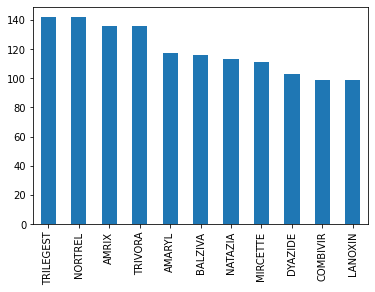

In [279]:
df.DRUG.value_counts().plot(kind='bar')

In [281]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!N0GWPVK!D6RZMO!28U2G_GBCT8YP2.JPG',
 'PillProjectDisc1/images/!P31ERRM_M7RRSPBWHL80GEAAAA6WF.JPG',
 'PillProjectDisc1/images/!XXJR-NQ-A-4POK3ZKW1CTLALT2N83.PNG',
 'PillProjectDisc1/images/!_1RYL_F1RDMPO3SRTSBK2L-G2C!KN.PNG',
 'PillProjectDisc10/images/6S1EGUCUJUCS5Y2G_PVBETH0A9X22L.JPG',
 'PillProjectDisc10/images/6_6!XJ73P9O12E6LVGBAIIGMNO252A.JPG',
 'PillProjectDisc10/images/6_6!XJ73P9O12E6LVGBAIIGMNO252A.JPG',
 'PillProjectDisc10/images/7!U5OIAL6W!52!L488NFS4OZ9B86QM.CR2',
 'PillProjectDisc10/images/7-UZK9UIGDQAHEGLPZ5!HYONW5F16L.JPG',
 'PillProjectDisc10/images/726N6FO55R1JXV6JSTW0Z-CWY6OBB-.JPG']

# Retrieve Data

## FTP

In [329]:
%cd Data/images

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/images


In [316]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
#ftpdir

for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        with open(value, 'wb') as fp:
            ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')

In [316]:
# convert to JPG

for filename in os.listdir():
    if filename.endswith(".PNG") or filename.endswith(".JPG"): 
        im1 = Image.open(r'{}'.format(filename))
        rgb_im = im1.convert('RGB')
        rgb_im.save(r'../pills_jpg/unclassified/{}''.JPG'.format(filename[:-4]))
        continue
    elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
        print(filename)
        raw = rawpy.imread('{}'.format(filename))
        rgb = raw.postprocess()
        imageio.imsave('../pills_jpg/unclassified/{}''.JPG'.format(filename[:-4]), rgb)
        print(filename)
        continue

^^^ Everything above this is getting the images from FTP to my machine and converting to JPG; not sorted!

In [285]:
df = df[df.FILETYPE != '.WMV']
df['FILENAME'] = df['FILENAME'].str.replace('.CR2','.JPG')
df['FILENAME'] = df['FILENAME'].str.replace('.PNG','.JPG')
df['FILENAME'] = df['FILENAME'].str.replace('.CR2','.PNG')

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
1783,00007365022,1,PillProjectDisc40/images/BNCP-9IQ3I-B1AK05KJGY...,C3PI_Reference,DYAZIDE,PillProjectDisc40,images,BNCP-9IQ3I-B1AK05KJGYPKFXB8Z-W9.JPG,.CR2
1784,00007365022,1,PillProjectDisc70/images/CMY2RZHAK0IQFKI-EJ91T...,C3PI_Reference,DYAZIDE,PillProjectDisc70,images,CMY2RZHAK0IQFKI-EJ91TX_KKA3OWJE.JPG,.CR2
1785,00007365022,1,PillProjectDisc77/images/CSZ5USH95QL78TU2L!U55...,C3PI_Reference,DYAZIDE,PillProjectDisc77,images,CSZ5USH95QL78TU2L!U5510IOGAASAX.JPG,.CR2
1786,00007365022,1,PillProjectDisc91/images/IXBCZI_!IQP!E9MWTSA2Y...,C3PI_Reference,DYAZIDE,PillProjectDisc91,images,IXBCZI_!IQP!E9MWTSA2YJDRIPOZAG.JPG,.CR2
1787,00007365022,1,PillProjectDisc103/images/TPEMYB_VH6IQ_M_J7D0!...,C3PI_Test,DYAZIDE,PillProjectDisc103,images,TPEMYB_VH6IQ_M_J7D0!NS2G0-P788.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
118419,63459070160,1,PillProjectDisc49/images/BVSJUMXA_2YYIA9FWAZP2...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc49,images,BVSJUMXA_2YYIA9FWAZP29031ZHTEZD.JPG,.PNG
118420,63459070160,1,PillProjectDisc57/images/CA4VW8H6_G6B36O_99TJW...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc57,images,CA4VW8H6_G6B36O_99TJW4ZGLRS3U8O.JPG,.PNG
118421,63459070160,1,PillProjectDisc90/images/I8IP8T6CW_VUGZZYPH30_...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc90,images,I8IP8T6CW_VUGZZYPH30_23W15HQT8.JPG,.PNG
118422,63459070160,1,PillProjectDisc97/images/ODUQGLEEXJEAR-FL18J81...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc97,images,ODUQGLEEXJEAR-FL18J81ALC-U55S-.JPG,.PNG


In [384]:
trilegest_dir  = 'trilegest'
nortrel_dir    = 'nortrel'
trivora_dir    = 'trivora'
amrix_dir      = 'amrix'
amaryl_dir     = 'amaryl'
balziva_dir    = 'balziva'
natazia_dir    = 'natazia'
mircette_dir   = 'mircette'
dyazide_dir    = 'dyazide'
lanoxin_dir    = 'lanoxin'
new_dir        = 'data/pills_jpg/split/'
images         = 'data/pills_jpg'
unclass         = 'unclassified'

In [248]:
os.mkdir(trilegest_dir)
os.mkdir(nortrel_dir)
os.mkdir(amrix_dir)
os.mkdir(trivora_dir)
os.mkdir(amaryl_dir)
os.mkdir(balziva_dir)
os.mkdir(natazia_dir)
os.mkdir(mircette_dir)
os.mkdir(dyazide_dir)
os.mkdir(lanoxin_dir)
os.mkdir(new_dir)

FileNotFoundError: [Errno 2] No such file or directory: 'data/pills_jpg/split/'

In [331]:
imgs_trilegest = df.FILENAME[df.NDC == '00555903270'].tolist()
imgs_nortrel   = df.FILENAME[df.NDC == '00555901258'].tolist()
imgs_trivora   = df.FILENAME[df.NDC == '52544029128'].tolist()
imgs_amrix     = df.FILENAME[df.NDC == '63459070160'].tolist()
imgs_amaryl    = df.FILENAME[df.NDC == '00039022310'].tolist()
imgs_balziva   = df.FILENAME[df.NDC == '00555903458'].tolist()
imgs_natazia   = df.FILENAME[df.NDC == '50419040901'].tolist()
imgs_mircette  = df.FILENAME[df.NDC == '51285011458'].tolist()
imgs_dyazide   = df.FILENAME[df.NDC == '00007365022'].tolist()
imgs_combivir  = df.FILENAME[df.NDC == '49702020218'].tolist()
imgs_lanoxin   = df.FILENAME[df.NDC == '00173024255'].tolist()

In [332]:
druglist = [imgs_trilegest,
            imgs_nortrel, 
            imgs_trivora,
            imgs_amrix , 
            imgs_amaryl ,
            imgs_balziva,
            imgs_natazia,
            imgs_mircette,
            imgs_dyazide,
            imgs_lanoxin]

In [333]:
pathlist = [trilegest_dir,
            nortrel_dir, 
            trivora_dir,
            amrix_dir , 
            amaryl_dir ,
            balziva_dir,
            natazia_dir,
            mircette_dir,
            dyazide_dir,
            lanoxin_dir]

In [337]:
%cd pills_jpg

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/pills_jpg


In [75]:
origin,destination

('data/pills_jpg/7!U5OIAL6W!52!L488NFS4OZ9B86QM.JPG',
 'data/pills_jpg/nortrel/7!U5OIAL6W!52!L488NFS4OZ9B86QM.JPG')

In [385]:
for img in imgs_trilegest:
    origin = os.path.join(unclass, img)
    destination = os.path.join(trilegest_dir, img)
    try:
        shutil.move(origin, destination)
    except:
        continue

In [386]:
for img in imgs_nortrel:
    origin = os.path.join(unclass, img)
    destination = os.path.join(nortrel_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [387]:
for img in imgs_trivora:
    origin = os.path.join(unclass, img)
    destination = os.path.join(trivora_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [388]:
for img in imgs_amrix:
    origin = os.path.join(unclass, img)
    destination = os.path.join(amrix_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [389]:
for img in imgs_amaryl:
    origin = os.path.join(unclass, img)
    destination = os.path.join(amaryl_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [390]:
for img in imgs_balziva:
    origin = os.path.join(unclass, img)
    destination = os.path.join(balziva_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [391]:
for img in imgs_natazia:
    origin = os.path.join(unclass, img)
    destination = os.path.join(natazia_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [392]:
for img in imgs_mircette:
    origin = os.path.join(unclass, img)
    destination = os.path.join(mircette_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [393]:
for img in imgs_dyazide:
    origin = os.path.join(unclass, img)
    destination = os.path.join(dyazide_dir, img)
    try:
        shutil.move(origin,destination)
    except:
        continue

In [375]:
for img in imgs_lanoxin:
    origin = os.path.join(unclass, img)
    destination = os.path.join(lanoxin_dir, img)
    try:
        shutil.move(origin, destination)
    except:
        continue

In [301]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/pills_jpg/unclassified

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/pills_jpg/unclassified


In [93]:
imgs_nortela = imgs_trilegest[:90]
for img in imgs_nortela:
    origin = os.path.join(images, img)
    destination = os.path.join(trilegest_dir, img)
    shutil.move(origin, 
                destination)

In [71]:
img

'CVCFM3B4PL!67K921BF!G_7NVWYAN4X.PNG'

In [72]:
origin

'data/images/CVCFM3B4PL!67K921BF!G_7NVWYAN4X.PNG'

In [73]:
destination

'data/split/train/LANOXIN/CVCFM3B4PL!67K921BF!G_7NVWYAN4X.PNG'

In [251]:
df[df.FILENAME == 'Z4DLBKOT9M01!1VAYS90Z2JNTMWL4.JPG']

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
57421,00555901258,1,PillProjectDisc109/images/Z4DLBKOT9M01!1VAYS90...,C3PI_Reference,NORTREL,PillProjectDisc109,images,Z4DLBKOT9M01!1VAYS90Z2JNTMWL4.JPG,.CR2


In [148]:
riz = pills[pills.DRUG.str.contains('RIZA')]
riz.NDC.value_counts()

00173080661    37
51991036378    17
33342009407    17
33342008852    17
00093747243    17
00093747143    17
60505372301    17
23155024546    17
00781542606    17
53451010101    17
51991035478    17
Name: NDC, dtype: int64

In [ ]:
# train santa
imgs = imgs_santa[:271]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(train_santa, img)
    shutil.copyfile(origin, destination)

In [ ]:
# validation santa
imgs = imgs_santa[271:371]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(val_santa, img)
    shutil.copyfile(origin, destination)

In [ ]:
# test santa
imgs = imgs_santa[371:]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(test_santa, img)
    shutil.copyfile(origin, destination)

# Prep Images

## Augmentation

In [202]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data


In [223]:
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
1783,00007365022,1,PillProjectDisc40/images/BNCP-9IQ3I-B1AK05KJGY...,C3PI_Reference,DYAZIDE,PillProjectDisc40,images,BNCP-9IQ3I-B1AK05KJGYPKFXB8Z-W9.CR2,.CR2
1784,00007365022,1,PillProjectDisc70/images/CMY2RZHAK0IQFKI-EJ91T...,C3PI_Reference,DYAZIDE,PillProjectDisc70,images,CMY2RZHAK0IQFKI-EJ91TX_KKA3OWJE.CR2,.CR2
1785,00007365022,1,PillProjectDisc77/images/CSZ5USH95QL78TU2L!U55...,C3PI_Reference,DYAZIDE,PillProjectDisc77,images,CSZ5USH95QL78TU2L!U5510IOGAASAX.CR2,.CR2
1786,00007365022,1,PillProjectDisc91/images/IXBCZI_!IQP!E9MWTSA2Y...,C3PI_Reference,DYAZIDE,PillProjectDisc91,images,IXBCZI_!IQP!E9MWTSA2YJDRIPOZAG.CR2,.CR2
1787,00007365022,1,PillProjectDisc103/images/TPEMYB_VH6IQ_M_J7D0!...,C3PI_Test,DYAZIDE,PillProjectDisc103,images,TPEMYB_VH6IQ_M_J7D0!NS2G0-P788.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
118419,63459070160,1,PillProjectDisc49/images/BVSJUMXA_2YYIA9FWAZP2...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc49,images,BVSJUMXA_2YYIA9FWAZP29031ZHTEZD.PNG,.PNG
118420,63459070160,1,PillProjectDisc57/images/CA4VW8H6_G6B36O_99TJW...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc57,images,CA4VW8H6_G6B36O_99TJW4ZGLRS3U8O.PNG,.PNG
118421,63459070160,1,PillProjectDisc90/images/I8IP8T6CW_VUGZZYPH30_...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc90,images,I8IP8T6CW_VUGZZYPH30_23W15HQT8.PNG,.PNG
118422,63459070160,1,PillProjectDisc97/images/ODUQGLEEXJEAR-FL18J81...,MC_COOKED_CALIBRATED_V1.2,AMRIX,PillProjectDisc97,images,ODUQGLEEXJEAR-FL18J81ALC-U55S-.PNG,.PNG


In [225]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification'

In [255]:
df.DRUG.loc[df.NDC == '00173024255']

Series([], Name: DRUG, dtype: object)

In [283]:
df.DRUG.value_counts().index.tolist()

['TRILEGEST',
 'NORTREL',
 'AMRIX',
 'TRIVORA',
 'AMARYL',
 'BALZIVA',
 'NATAZIA',
 'MIRCETTE',
 'DYAZIDE',
 'COMBIVIR',
 'LANOXIN']

In [286]:
df.to_csv('data/modelpills.csv')